In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
df = pd.read_excel('dataset/cleaned_dataset.xlsx')

In [3]:
df

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi,harga,kecamatan,kota,provinsi
0,60,60,3,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",550000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.
1,87,85,3,2,2,"Sawah Besar, Jakarta Pusat, Jakarta D.K.I.",795000007,Sawah Besar,Jakarta Pusat,Jakarta D.K.I.
2,79,60,2,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",589300023,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.
3,144,41,2,1,1,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",495000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.
4,90,60,4,2,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",2100000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.
...,...,...,...,...,...,...,...,...,...,...
1543,62,53,3,2,2,"Palmerah, Jakarta Barat, Jakarta D.K.I.",700000900,Palmerah,Jakarta Barat,Jakarta D.K.I.
1544,90,36,2,1,1,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",475000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.
1545,90,69,3,2,2,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",900000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.
1546,60,55,2,2,2,"Palmerah, Jakarta Barat, Jakarta D.K.I.",500000001,Palmerah,Jakarta Barat,Jakarta D.K.I.


In [4]:
df_sel = df[['luas_tanah', 'luas_bangunan', 'kamar_tidur', 'kamar_mandi', 'lantai', 'harga']]

In [5]:
df_sel

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga
0,60,60,3,2,2,550000000
1,87,85,3,2,2,795000007
2,79,60,2,2,2,589300023
3,144,41,2,1,1,495000000
4,90,60,4,2,1,2100000000
...,...,...,...,...,...,...
1543,62,53,3,2,2,700000900
1544,90,36,2,1,1,475000000
1545,90,69,3,2,2,900000000
1546,60,55,2,2,2,500000001


In [6]:
df_sel.corr(method='pearson')

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga
luas_tanah,1.000000,0.683013,0.560292,0.441937,0.074568,0.689191
luas_bangunan,0.683013,1.000000,0.660535,0.685121,0.461481,0.797858
kamar_tidur,0.560292,0.660535,1.000000,0.707660,0.384380,0.609563
kamar_mandi,0.441937,0.685121,0.707660,1.000000,0.565360,0.614404
lantai,0.074568,0.461481,0.384380,0.565360,1.000000,0.329670
harga,0.689191,0.797858,0.609563,0.614404,0.329670,1.000000


In [156]:
# df_sel = df[['luas_tanah', 'luas_bangunan', 'kamar_tidur', 'kamar_mandi', 'harga']]
df_sel = df[['harga']]

In [157]:
df_sel

,harga
0,550000000
1,795000007
2,589300023
3,495000000
4,2100000000
...,...
1543,700000900
1544,475000000
1545,900000000
1546,500000001


In [9]:
def SelBest(arr:list, X:int)->list:

    dx=np.argsort(arr)[:X]
    return arr[dx]

In [205]:
ks = np.arange(2,11)
bics = []
for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full', init_params='random')
    gmm.fit(df_sel)
    bics.append(gmm.bic(df_sel))

Text(0.5, 1.0, 'BIC Scores')

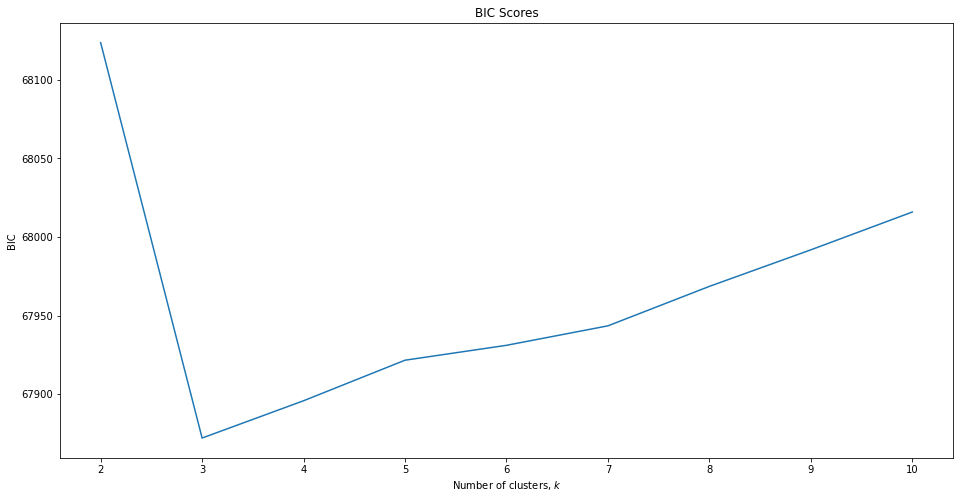

In [206]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(ks, bics)
ax.set_xlabel(r'Number of clusters, $k$')
ax.set_ylabel('BIC')
ax.set_xticks(ks)
plt.title("BIC Scores")

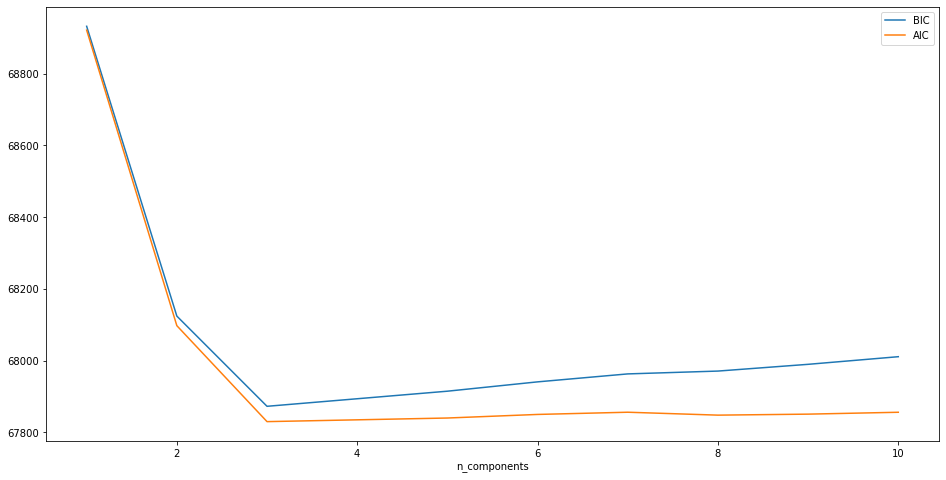

In [207]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', init_params='random').fit(df_sel)
          for n in n_components]

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(n_components, [m.bic(df_sel) for m in models], label='BIC')
ax.plot(n_components, [m.aic(df_sel) for m in models], label='AIC')
# plt.plot(n_components, [m.bic(df_sel) for m in models], label='BIC')
# plt.plot(n_components, [m.aic(df_sel) for m in models], label='AIC')
ax.legend(loc='best')
ax.set_xlabel('n_components');

In [15]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [16]:
n_clusters=np.arange(2, 11)
iterations=20
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(df_sel, test_size=0.5)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

C:\Users\MSI\mambaforge\lib\site-packages\sklearn\mixture\_base.py:443: RuntimeWarning: covariance is not positive-semidefinite.
  rng.multivariate_normal(mean, covariance, int(sample))
C:\Users\MSI\mambaforge\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\MSI\mambaforge\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\MSI\mambaforge\lib\site-packages\sklearn\mixture\_base.py:443: RuntimeWarning: covariance is not positive-semidefinite.
  rng.multivariate_normal(mean, covariance, int(sample))
C:\Users\MSI\mambaforge\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\MSI\mambaforge\lib\site-packages\sklearn\base.py:450: UserWarning: X does not h

Text(0, 0.5, 'Distance')

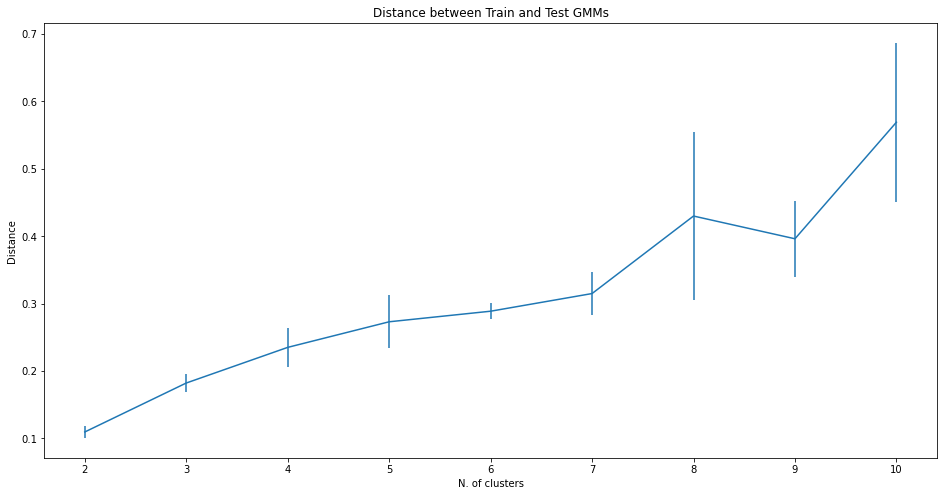

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs")
plt.xticks(n_clusters)
ax.set_xlabel("N. of clusters")
ax.set_ylabel("Distance")
# plt.show()

C:\Users\MSI\AppData\Local\Temp/ipykernel_11864/1076770611.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, S, 'bo-', color='black')


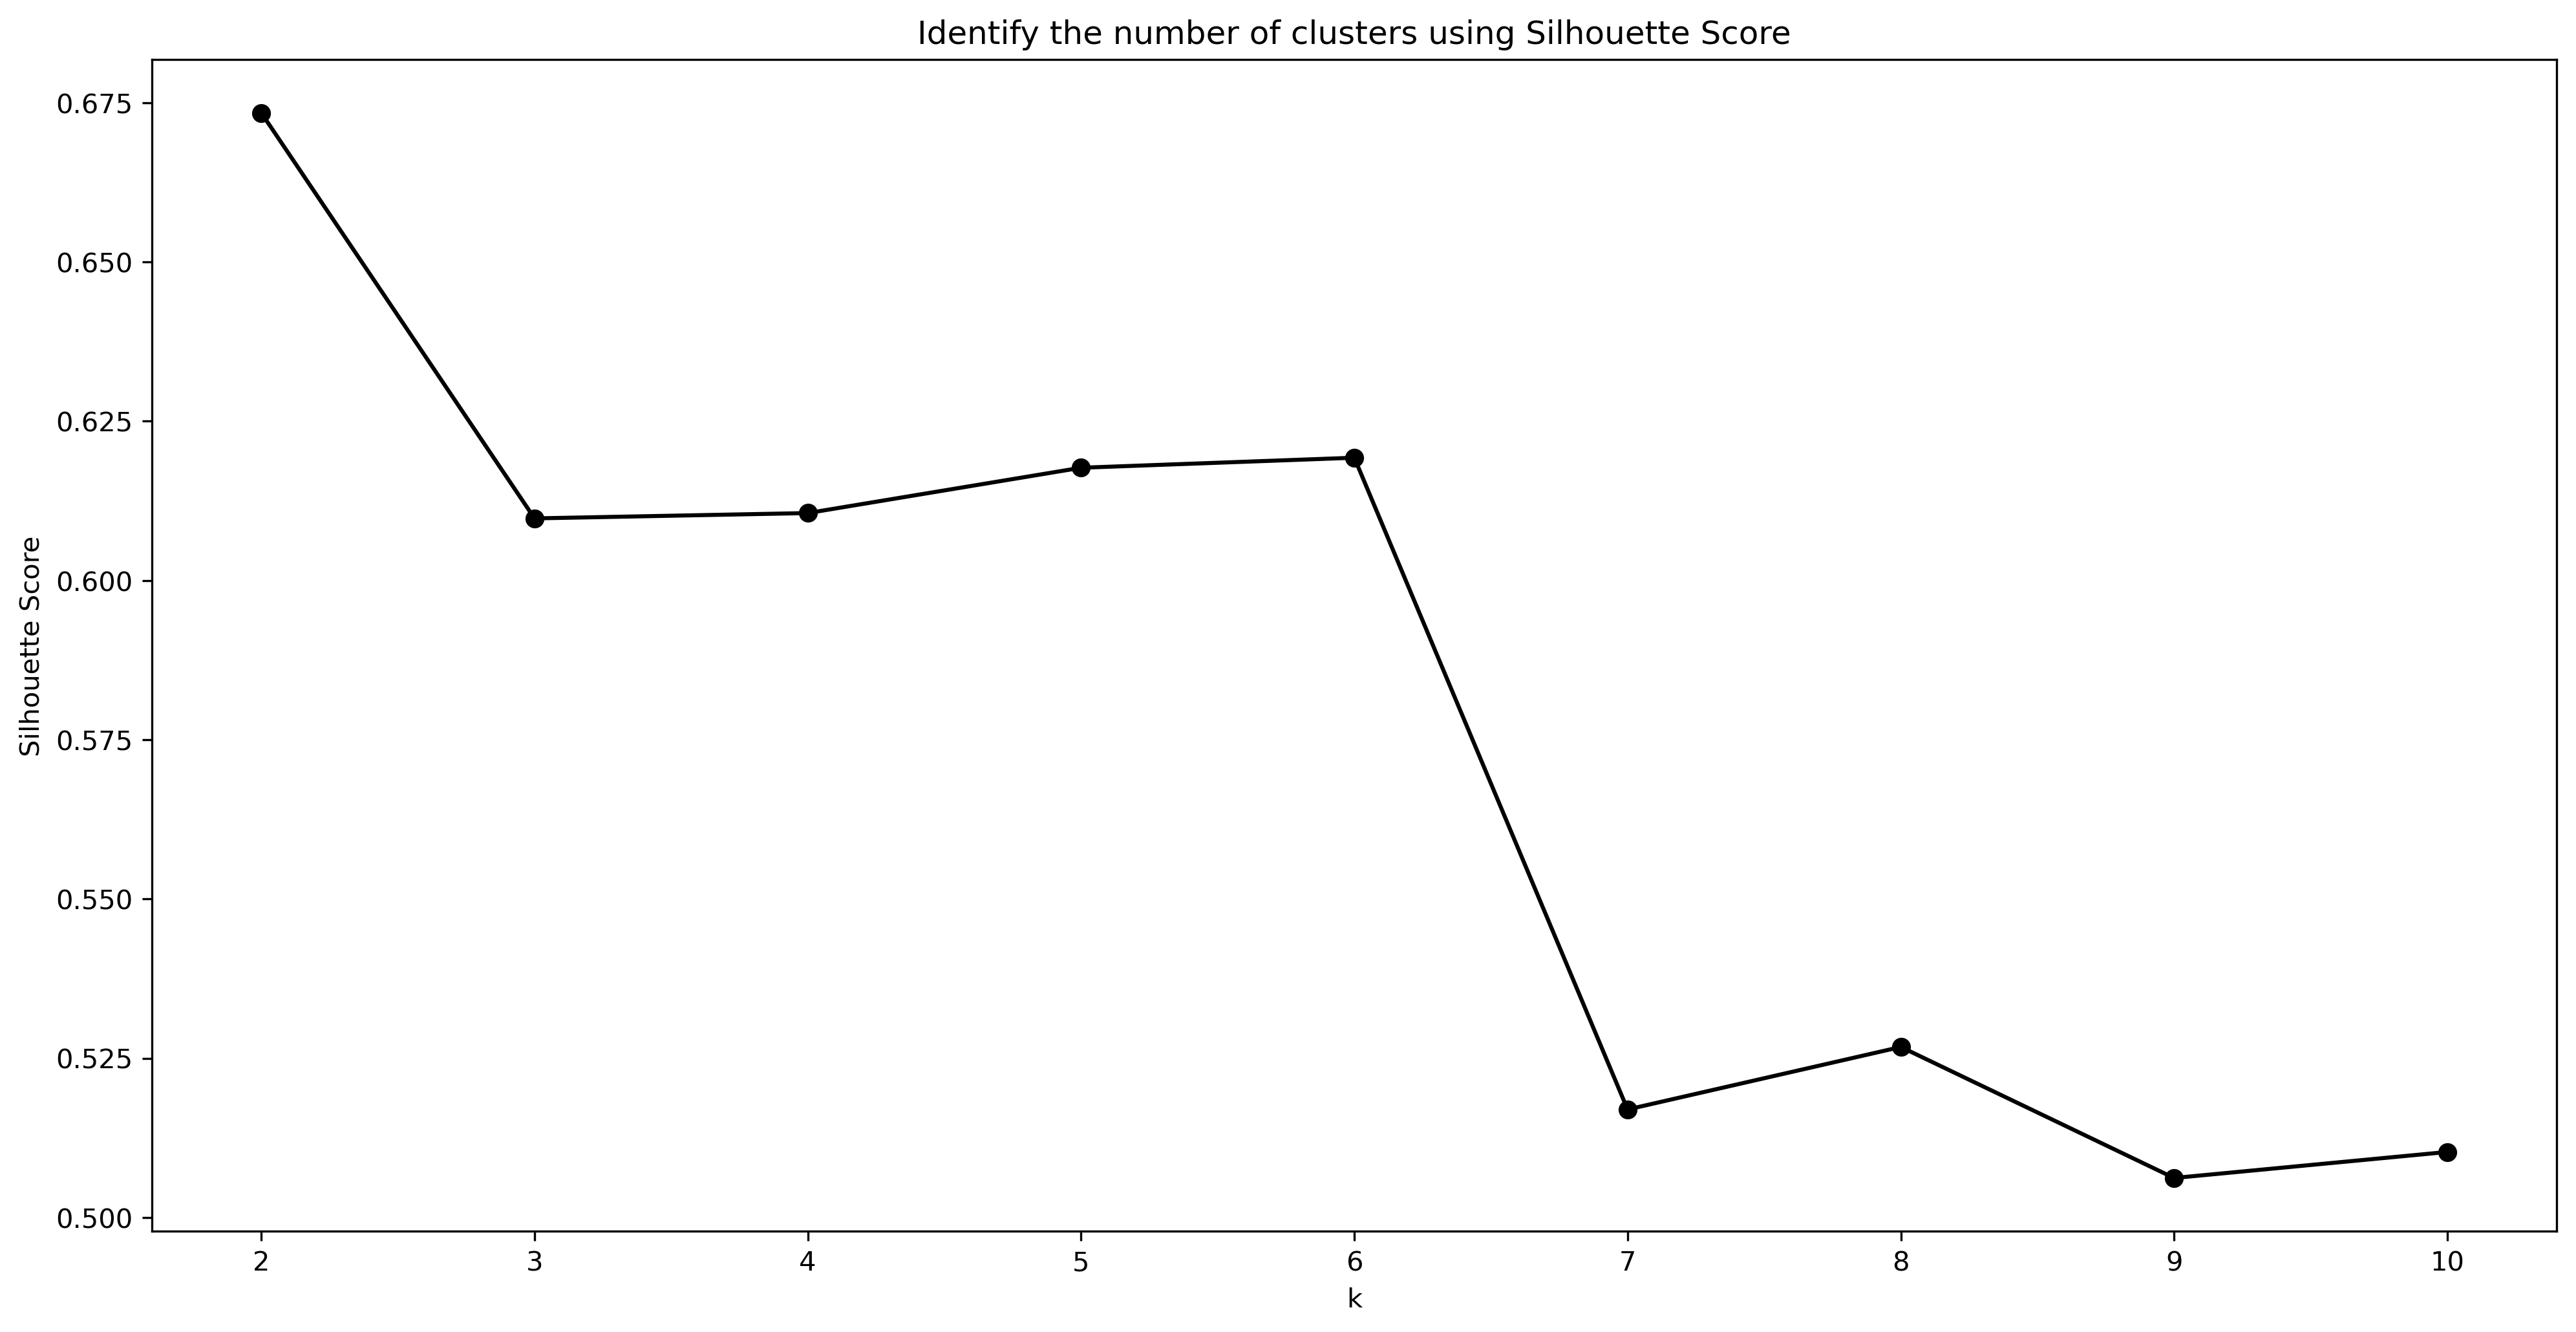

In [161]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = df_sel

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [220]:
model = GaussianMixture(n_components=3, covariance_type='full', init_params='random')
labels = model.fit_predict(X)
silscore = metrics.silhouette_score(X, labels)
print(silscore)

0.6084118056185875


In [189]:
model.weights_

array([0.08187355, 0.34230606, 0.08035332, 0.09608471, 0.07376408,
       0.08752901, 0.08229939, 0.07311806, 0.08267182])

In [192]:
model.covariances_

array([[[2.62657290e+17]],

       [[4.07538375e+16]],

       [[2.59134706e+17]],

       [[1.33301615e+17]],

       [[5.45520279e+17]],

       [[1.87714573e+17]],

       [[2.01916607e+18]],

       [[9.33855513e+17]],

       [[2.35391986e+17]]])

In [14]:
model = GaussianMixture(n_components=6)
model.fit(df_sel)

GaussianMixture(n_components=6)

In [208]:
cluster = model.predict(df_sel)
cluster

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [16]:
silhouette_score(df_sel, cluster)

0.3270026811293097

In [221]:
df['Cluster'] = labels

In [222]:
df

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi,harga,kecamatan,kota,provinsi,Cluster
0,60,60,3,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",550000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,0
1,87,85,3,2,2,"Sawah Besar, Jakarta Pusat, Jakarta D.K.I.",795000007,Sawah Besar,Jakarta Pusat,Jakarta D.K.I.,0
2,79,60,2,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",589300023,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,0
3,144,41,2,1,1,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",495000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.,0
4,90,60,4,2,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",2100000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.,2
...,...,...,...,...,...,...,...,...,...,...,...
1543,62,53,3,2,2,"Palmerah, Jakarta Barat, Jakarta D.K.I.",700000900,Palmerah,Jakarta Barat,Jakarta D.K.I.,0
1544,90,36,2,1,1,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",475000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.,0
1545,90,69,3,2,2,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",900000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.,0
1546,60,55,2,2,2,"Palmerah, Jakarta Barat, Jakarta D.K.I.",500000001,Palmerah,Jakarta Barat,Jakarta D.K.I.,0


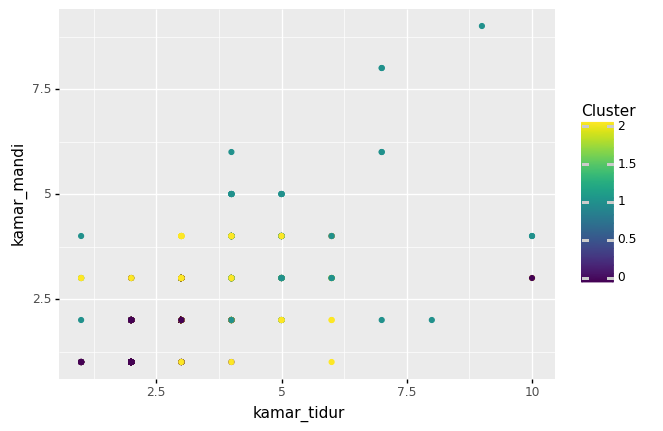

<ggplot: (121971686759)>

In [226]:
from plotnine import ggplot, aes, geom_point
(ggplot(df, aes(x = 'kamar_tidur', y = 'kamar_mandi', color = 'Cluster')) + geom_point())

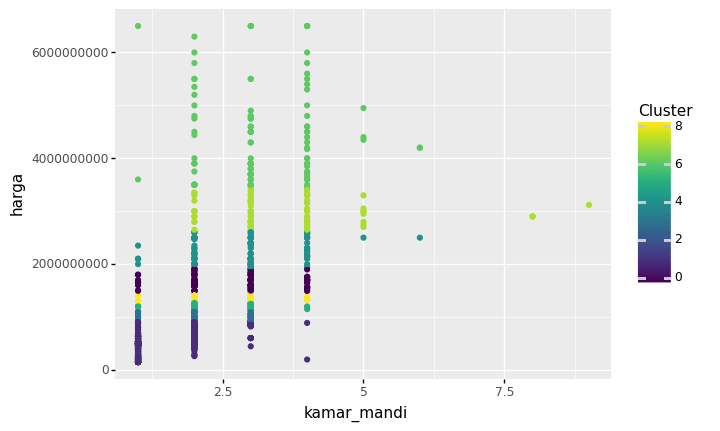

<ggplot: (121969972574)>

In [199]:
from plotnine import ggplot, aes, geom_point
(ggplot(df, aes(x = 'kamar_mandi', y = 'harga', color = 'Cluster')) + geom_point())

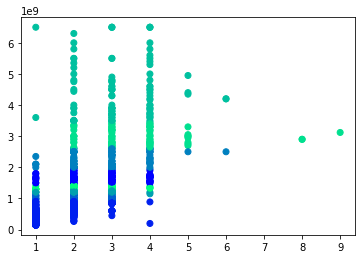

In [201]:
plt.scatter(df['kamar_mandi'], df['harga'],  
           c = labels, cmap =plt.cm.winter) 
plt.show() 